
# House Price Prediction - Kaggle Competition

## Introduction
This project predicts house sale prices using the **House Prices: Advanced Regression Techniques** dataset from Kaggle.  
By applying data preprocessing, feature engineering, and regression modeling, we aim to create an accurate predictive model that can assist buyers, sellers, and real estate professionals in making informed decisions.

**Goals:**
- Understand key factors affecting house prices
- Apply data cleaning and feature engineering techniques
- Build and evaluate predictive models


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")



## Data Loading
Dataset: [Kaggle House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
Please place the dataset (`train.csv`) in the `data/` folder before running this notebook.


In [9]:

# Load dataset
df = pd.read_csv("./train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



## Data Preprocessing
We will:
1. Handle missing values
2. Convert categorical variables into dummy variables
3. Remove unnecessary columns


In [10]:

# Check missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Example: Fill missing numerical with median, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert categorical to dummy variables
df = pd.get_dummies(df, drop_first=True)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64



## Feature Engineering
We will create additional features such as:
- **HouseAge**: Age of the house
- **GarageAge**: Age of the garage
- **Renovated**: Whether the house was renovated


In [11]:

# House Age
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

# Garage Age
df["GarageAge"] = np.where(df["GarageYrBlt"] > 0, df["YrSold"] - df["GarageYrBlt"], 0)

# Renovated Feature
df["Renovated"] = np.where(df["YearRemodAdd"] != df["YearBuilt"], 1, 0)



## Train-Test Split


In [12]:

X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Modeling
We will train and compare three models:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor


In [13]:

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.3f}")


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression → RMSE: 51496.67, R²: 0.654


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest → RMSE: 28865.06, R²: 0.891
Gradient Boosting → RMSE: 28349.91, R²: 0.895


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



## Feature Importance


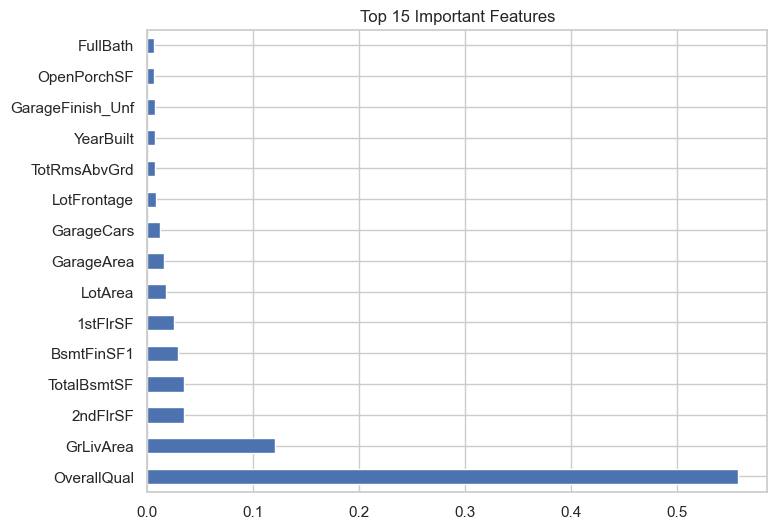

In [14]:

rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Important Features")
plt.show()



## Conclusion
- We built multiple regression models to predict house sale prices.
- Feature engineering improved model performance.
- The most influential features include Overall Quality, Living Area, and Garage-related attributes.
